<H1>Лабораторная работа №9</H1>

<H3>Ким Д.А. 5130901/10201</H3>

<H3>Упражнение 9.2</H3>

Изучим влияние diff и  differentiate на сигнал. Создадим треугольный сигнал и опробуем как эти операции влияют на него.

In [1]:
import thinkdsp
import numpy as np
import matplotlib.pyplot as plt

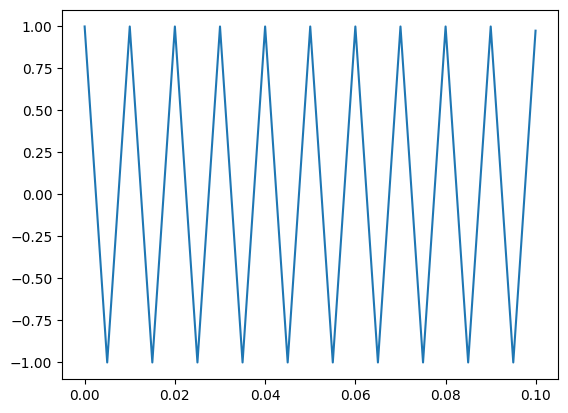

In [3]:
triagWave = thinkdsp.TriangleSignal(freq=100).make_wave(duration=0.1, framerate=16000)
triagWave.plot()

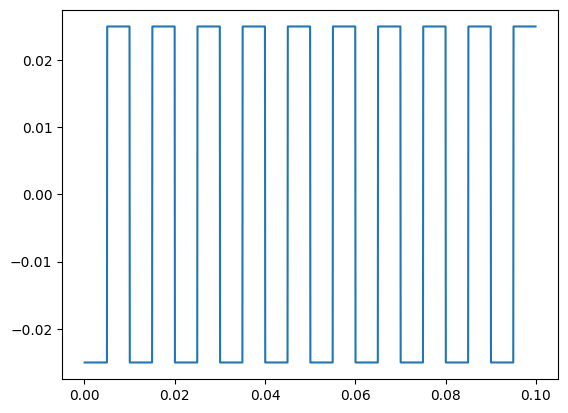

In [4]:
diffWave = triagWave.diff()
diffWave.plot()

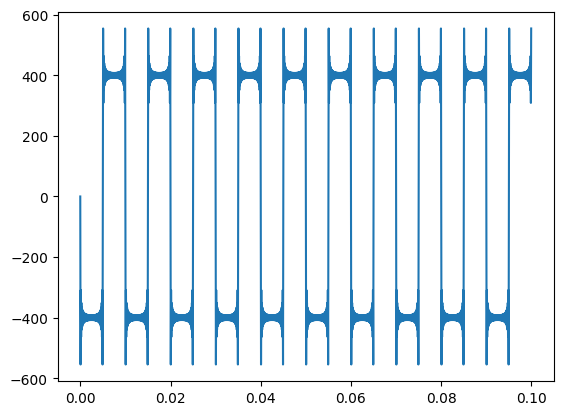

In [5]:
differWave = triagWave.make_spectrum().differentiate().make_wave()
differWave.plot()

Мы применили функцию diff на сигнал и увидели, что производная треугольного сигнала это прямоугольный. Далее мы вычислили спектр сигнала и применили на него функцию differentiate, а потом преобразовали это обратно в сигнал. По сравнению с первым примером появляется шум в виде звона. Это происходит из-за того, что в некоторых точках производная треугольного сигнала не определена, что не является проблемой для конечной разности.

<H3>Упражнение 9.3</H3>

Исследуем влияние операций cumsum и integrate на сигнал на примере прямоугольного сигнала.

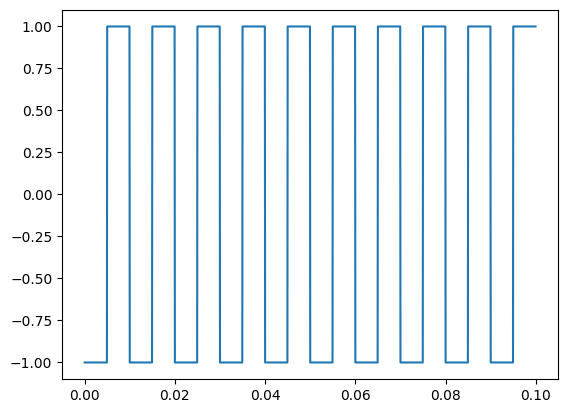

In [11]:
squareWave = thinkdsp.SquareSignal(freq=100).make_wave(duration=0.1, framerate=16000)
squareWave.plot()

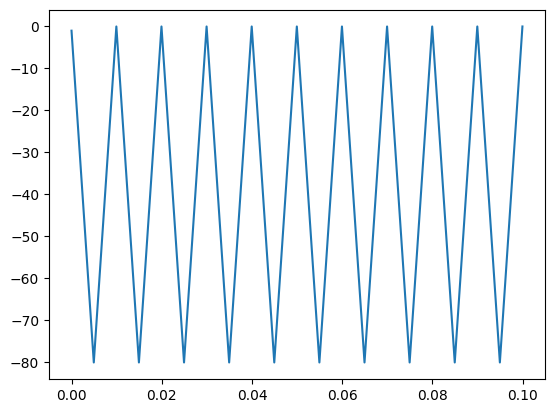

In [12]:
sumWave = squareWave.cumsum()
sumWave.plot()

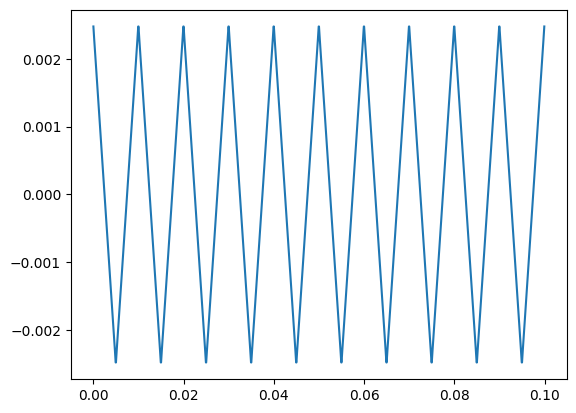

In [13]:
integrSpectrum = squareWave.make_spectrum().integrate()
integrSpectrum.hs[0] = 0
integrWave = integrSpectrum.make_wave()
integrWave.plot()

Мы применили cumsum на прямоугольный сигнал и функцию integrate на его спектр, а потом преобразовали результат обратно в волну. Накакпливающая сумма и интеграл прямоугольного сигнала это треугольный сигнал, что соответствует результатам из предыдущего пункта. Сигналы, котороые мы получили почти совпадают, но отличаются по амплитуде.

<H3>Упражнение 9.4</H3>

Изучим влияние двойного интегрирования на примере пилообразного сигнала.

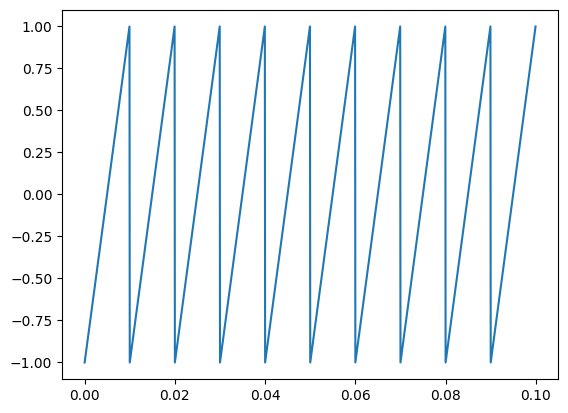

In [14]:
sawWave = thinkdsp.SawtoothSignal(freq=100).make_wave(duration=0.1, framerate=16000)
sawWave.plot()

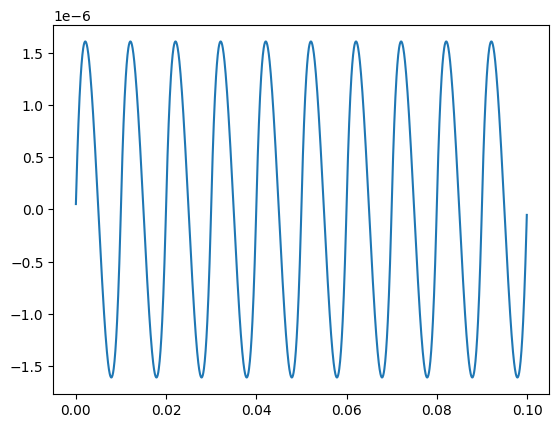

In [16]:
doubleIntegrSpectrum = sawWave.make_spectrum().integrate().integrate()
doubleIntegrSpectrum.hs[0] = 0
doubleIntegrWave = doubleIntegrSpectrum.make_wave()
doubleIntegrWave.plot()

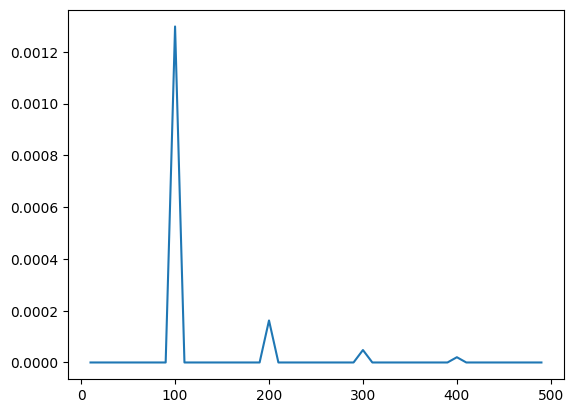

In [21]:
doubleIntegrSpectrum.plot(high=500)

Результат похож на синусоиду, так как интегрирование выполняет роль фильтра низких частот. Кроме фундаментальной частоты вклад остальных частот минимален.

<H3>Упражнение 9.5</H3>

Изучим влияние второй конечной разности и второй производной на примере кубического сигнала.

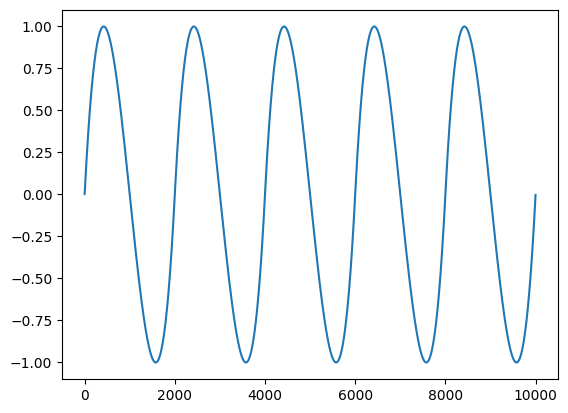

In [37]:
cubicWave = thinkdsp.CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
cubicWave.plot()

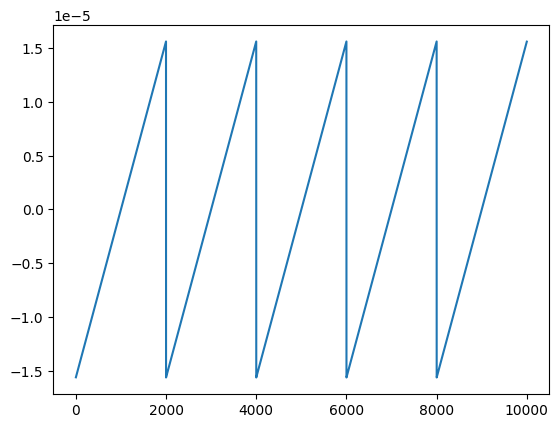

In [38]:
doubleDiffWave = cubicWave.diff().diff()
doubleDiffWave.plot()

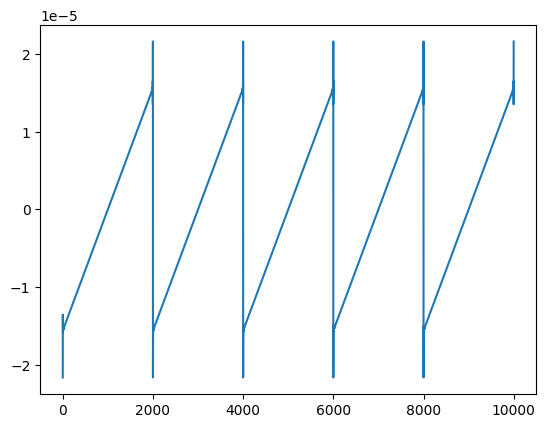

In [39]:
doubleDifferWave = cubicWave.make_spectrum().differentiate().differentiate().make_wave()
doubleDifferWave.plot()

При втором взятии производной получаем звон. Это вновь связано с тем, что производная параболического сигнала неопределена в некоторых точках.

С помощью ДПФ найдем фильтры второй разности и второй производной.

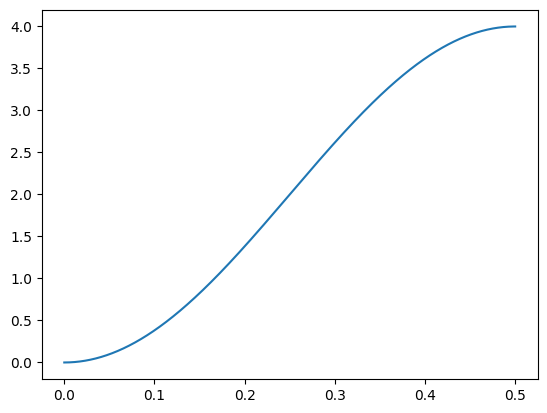

In [40]:
diff_window = np.array([-1, 2, -1])
padded = thinkdsp.zero_pad(diff_window, len(cubicWave))
diff_wave = thinkdsp.Wave(padded, framerate=cubicWave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()

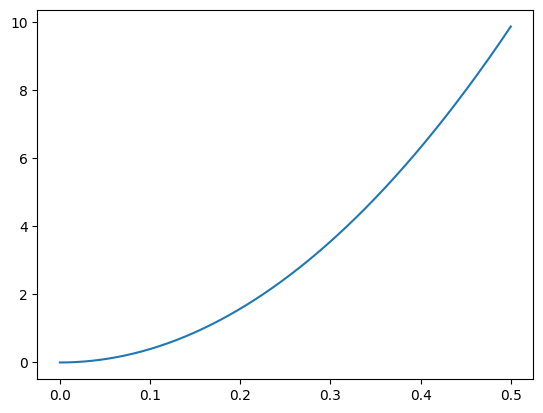

In [41]:
deriv_filter = cubicWave.make_spectrum()
deriv_filter.hs = (thinkdsp.PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot()

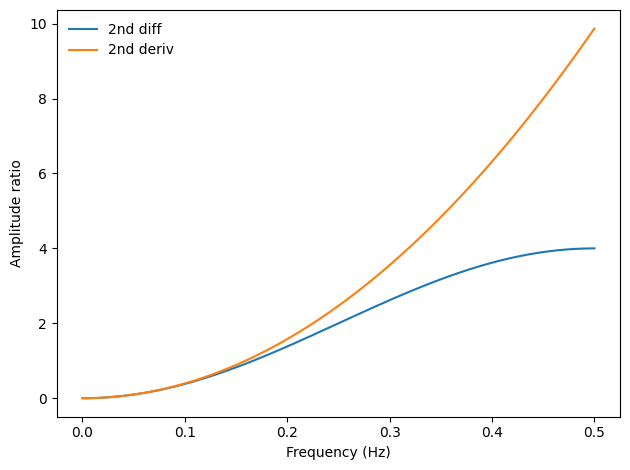

In [42]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

thinkdsp.decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Оба являются фильтрами верхних частот, однако конечная разность является точной аппроксимацией для производной только для низких частот. При высоких она значительно отличается.